<a href="https://colab.research.google.com/github/mthsansu/MLNLP/blob/main/Code/Descriptive_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#!pip install datasets

In [18]:
#import torch
import numpy as np
#import datasets
#from datasets import load_dataset
from tqdm import tqdm
import nltk
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
import pandas as pd
from collections import Counter
import torchtext
from sklearn.model_selection import train_test_split

from termcolor import colored

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import datetime as dt

In [19]:
# Import data
git_url = "https://raw.githubusercontent.com/mthsansu/MLNLP/main/Data/"
#df = pd.read_csv(git_url + 'df_1000_rand_full.csv')
df = pd.read_csv(git_url + 'Tweets_sample_confinement.csv', index_col=0)

In [20]:
df['date'] = df['created_at'].str[:10]
df['date'] = pd.to_datetime(df['date'])

In [21]:
df.head()

,author_id,possibly_sensitive,id,text,created_at,twitter,sexe,age,majo,num_deptmt,groupe_sigle,parti_ratt_financier,nb_mandats,age_group,date
478,889730003495211009,False,1267043323501580289,La viticulture c’est 600000 emplois dans 66 dé...,2020-05-31T10:40:43.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2020-05-31
480,889730003495211009,False,1266032133497380865,Réunion en visioconférence pour le #GAP #agric...,2020-05-28T15:42:37.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2020-05-28
482,889730003495211009,False,1265595756431409152,Cérémonie patriotique en l'honneur des résista...,2020-05-27T10:48:36.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2020-05-27
484,889730003495211009,False,1265287394724634626,<U+0001F58A> J’ai co-signé le courrier de mon ...,2020-05-26T14:23:17.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2020-05-26
486,889730003495211009,False,1264887573442449408,J’ai saisi ce jour le Directeur général de l’@...,2020-05-25T11:54:32.000Z,AdrienMorenas,M,35,True,84,LREM,En marche !,1,2,2020-05-25


In [42]:
df.columns

Index(['author_id', 'possibly_sensitive', 'id', 'text', 'created_at',
       'twitter', 'sexe', 'age', 'majo', 'num_deptmt', 'groupe_sigle',
       'parti_ratt_financier', 'nb_mandats', 'age_group', 'date', 'words_len'],
      dtype='object')

In [22]:
# Number of different tweets in the database
print(len(df.id.unique()))

32767


In [23]:
# Number of different MPs in the database
print(len(df.author_id.unique()))

487


In [43]:
df.possibly_sensitive.value_counts()

False    32552
True       215
Name: possibly_sensitive, dtype: int64

In [24]:
df.date.value_counts()

2020-04-28    773
2020-05-28    617
2020-03-04    616
2020-04-30    515
2020-03-05    502
             ... 
2020-05-16    150
2020-05-23    150
2020-05-21    148
2020-03-14    147
2020-05-31    147
Name: date, Length: 92, dtype: int64

In [25]:
# Mean length of content in characters
df.text.apply(len).mean()

255.04104739524522

In [26]:
# let's add some basic information about the text: number of "words" (here we only split by a space, a really naive approach)
df['words_len'] = df.text.apply(lambda x: len(x.split(' ')) )

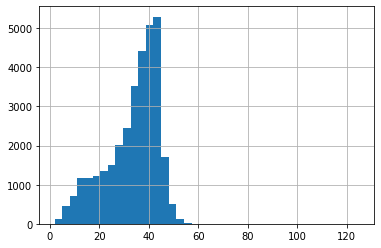

In [27]:
# Repartition of the content lengths (characters)
%matplotlib inline
df.words_len.hist(bins=40)

In [28]:
df.age_group.value_counts()

3    11257
2     7735
4     7468
1     4744
5     1563
Name: age_group, dtype: int64

In [29]:
df.groupe_sigle.value_counts()

LREM     17740
LR        4172
LFI       3826
NI        2036
MODEM     1964
UAI       1255
NG        1101
GDR        673
Name: groupe_sigle, dtype: int64

In [31]:
# Plot histogram for sex

df.sexe.value_counts()

M    19966
F    12801
Name: sexe, dtype: int64

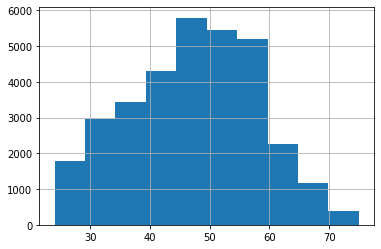

In [32]:
# Plot histogram for age

df["age"].hist()

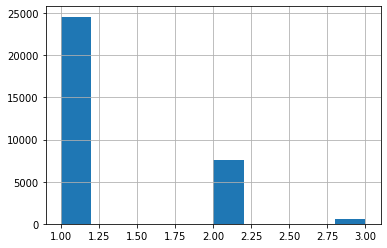

In [36]:
# Plot histogram for nb.mandats

hist = df["nb_mandats"].hist()

In [34]:
# Get number of majo

df.majo.value_counts()

True     21179
False    11588
Name: majo, dtype: int64